In [1]:
import numpy as np
import torch
import torchvision
from torchvision.datasets import CIFAR10

from connectivity_representation_learning import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load CIFAR-10 data

In [2]:
def imshow(img, ax=None):
    npimg = img.cpu().data.numpy()
    if not ax:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
    else:
        ax.imshow(np.transpose(npimg, (1, 2, 0)))

In [3]:
cifar_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])
    
cifar = CIFAR10(
    root='../datasets',
    train=True,
    transform=cifar_transform,
    download=False)

In [4]:
# only select a subset to speed-up learning
n = 50
loader = torch.utils.data.DataLoader(cifar, batch_size=n, shuffle=False)
dataiter = iter(loader)
data, _ = dataiter.next()

### Model setup

In [7]:
config_layers = {
    'type': 'conv2d',
    'input_size': (32, 32),
    'filters': [3, 16, 32, 64],
    'emb_size': 160,
}

use_cuda = False
eta = 2.0
tol = 1e-4
lr = 0.001
batch_size = 20
n_epochs = 1000

### Training

In [8]:
model_no_penalty = Model(config_layers, 
                         eta=eta,
                         tol=tol,
                         lr=lr,
                         batch_size=batch_size,
                         dim_batch=1,
                         use_cuda=use_cuda,
                         connectivity_penalty=0.0,
                        )

model_no_penalty.train(data, n_epochs)
torch.save(model_no_penalty.state_dict(), 'cifar10_no_penalty.pt')

model_penalty = Model(config_layers, 
                      eta=eta,
                      tol=tol,
                      lr=lr,
                      batch_size=batch_size,
                      dim_batch=1,
                      use_cuda=use_cuda,
                      connectivity_penalty=20.0,
                     )

model_penalty.train(data, n_epochs)
torch.save(model_penalty.state_dict(), 'cifar10_penalty.pt')

model_penalty_branches = Model(config_layers, 
                               eta=eta,
                               tol=tol,
                               lr=lr,      
                               batch_size=batch_size,
                               dim_batch=16,
                               use_cuda=use_cuda,
                               connectivity_penalty=20.0,
                              )

model_penalty_branches.train(data, n_epochs)
torch.save(model_penalty_branches.state_dict(), 'cifar10_penalty_branches.pt')

Epoch : 1/1000: 100%|█| 3.00/3.00 [00:00<00:00, 16.9it/s, connectivity loss=0, reconstruction loss=0.322]
Epoch : 2/1000: 100%|█| 3.00/3.00 [00:00<00:00, 33.0it/s, connectivity loss=0, reconstruction loss=0.314]
Epoch : 3/1000: 100%|█| 3.00/3.00 [00:00<00:00, 36.5it/s, connectivity loss=0, reconstruction loss=0.282]
Epoch : 4/1000: 100%|█| 3.00/3.00 [00:00<00:00, 41.6it/s, connectivity loss=0, reconstruction loss=0.234]
Epoch : 5/1000: 100%|█| 3.00/3.00 [00:00<00:00, 30.6it/s, connectivity loss=0, reconstruction loss=0.18] 
Epoch : 6/1000: 100%|█| 3.00/3.00 [00:00<00:00, 42.3it/s, connectivity loss=0, reconstruction loss=0.146]
Epoch : 7/1000: 100%|█| 3.00/3.00 [00:00<00:00, 31.8it/s, connectivity loss=0, reconstruction loss=0.118]
Epoch : 8/1000: 100%|█| 3.00/3.00 [00:00<00:00, 41.0it/s, connectivity loss=0, reconstruction loss=0.104]
Epoch : 9/1000: 100%|█| 3.00/3.00 [00:00<00:00, 28.4it/s, connectivity loss=0, reconstruction loss=0.0915]
Epoch : 10/1000: 100%|█| 3.00/3.00 [00:00<00:

Epoch : 77/1000: 100%|█| 3.00/3.00 [00:00<00:00, 39.9it/s, connectivity loss=0, reconstruction loss=0.0241]
Epoch : 78/1000: 100%|█| 3.00/3.00 [00:00<00:00, 33.2it/s, connectivity loss=0, reconstruction loss=0.024] 
Epoch : 79/1000: 100%|█| 3.00/3.00 [00:00<00:00, 38.6it/s, connectivity loss=0, reconstruction loss=0.0244]
Epoch : 80/1000: 100%|█| 3.00/3.00 [00:00<00:00, 35.7it/s, connectivity loss=0, reconstruction loss=0.0233]
Epoch : 81/1000: 100%|█| 3.00/3.00 [00:00<00:00, 35.5it/s, connectivity loss=0, reconstruction loss=0.023] 
Epoch : 82/1000: 100%|█| 3.00/3.00 [00:00<00:00, 34.9it/s, connectivity loss=0, reconstruction loss=0.0239]
Epoch : 83/1000: 100%|█| 3.00/3.00 [00:00<00:00, 38.4it/s, connectivity loss=0, reconstruction loss=0.024] 
Epoch : 84/1000: 100%|█| 3.00/3.00 [00:00<00:00, 34.3it/s, connectivity loss=0, reconstruction loss=0.0225]
Epoch : 85/1000: 100%|█| 3.00/3.00 [00:00<00:00, 34.4it/s, connectivity loss=0, reconstruction loss=0.0226]
Epoch : 86/1000: 100%|█| 3.0

Epoch : 152/1000: 100%|█| 3.00/3.00 [00:00<00:00, 36.6it/s, connectivity loss=0, reconstruction loss=0.0122]
Epoch : 153/1000: 100%|█| 3.00/3.00 [00:00<00:00, 36.2it/s, connectivity loss=0, reconstruction loss=0.0124]
Epoch : 154/1000: 100%|█| 3.00/3.00 [00:00<00:00, 41.0it/s, connectivity loss=0, reconstruction loss=0.0115]
Epoch : 155/1000: 100%|█| 3.00/3.00 [00:00<00:00, 31.5it/s, connectivity loss=0, reconstruction loss=0.0116]
Epoch : 156/1000: 100%|█| 3.00/3.00 [00:00<00:00, 43.9it/s, connectivity loss=0, reconstruction loss=0.0118]
Epoch : 157/1000: 100%|█| 3.00/3.00 [00:00<00:00, 41.3it/s, connectivity loss=0, reconstruction loss=0.0126]
Epoch : 158/1000: 100%|█| 3.00/3.00 [00:00<00:00, 45.6it/s, connectivity loss=0, reconstruction loss=0.0116]
Epoch : 159/1000: 100%|█| 3.00/3.00 [00:00<00:00, 45.6it/s, connectivity loss=0, reconstruction loss=0.011]
Epoch : 160/1000: 100%|█| 3.00/3.00 [00:00<00:00, 40.5it/s, connectivity loss=0, reconstruction loss=0.011] 
Epoch : 161/1000: 10

Epoch : 226/1000: 100%|█| 3.00/3.00 [00:00<00:00, 37.1it/s, connectivity loss=0, reconstruction loss=0.00684]
Epoch : 227/1000: 100%|█| 3.00/3.00 [00:00<00:00, 42.5it/s, connectivity loss=0, reconstruction loss=0.0072] 
Epoch : 228/1000: 100%|█| 3.00/3.00 [00:00<00:00, 37.9it/s, connectivity loss=0, reconstruction loss=0.00689]
Epoch : 229/1000: 100%|█| 3.00/3.00 [00:00<00:00, 40.5it/s, connectivity loss=0, reconstruction loss=0.00682]
Epoch : 230/1000: 100%|█| 3.00/3.00 [00:00<00:00, 40.4it/s, connectivity loss=0, reconstruction loss=0.00681]
Epoch : 231/1000: 100%|█| 3.00/3.00 [00:00<00:00, 41.4it/s, connectivity loss=0, reconstruction loss=0.00644]
Epoch : 232/1000: 100%|█| 3.00/3.00 [00:00<00:00, 40.6it/s, connectivity loss=0, reconstruction loss=0.00658]
Epoch : 233/1000: 100%|█| 3.00/3.00 [00:00<00:00, 43.5it/s, connectivity loss=0, reconstruction loss=0.00646]
Epoch : 234/1000: 100%|█| 3.00/3.00 [00:00<00:00, 40.7it/s, connectivity loss=0, reconstruction loss=0.00634]
Epoch : 23

Epoch : 300/1000: 100%|█| 3.00/3.00 [00:00<00:00, 54.0it/s, connectivity loss=0, reconstruction loss=0.00523]
Epoch : 301/1000: 100%|█| 3.00/3.00 [00:00<00:00, 59.2it/s, connectivity loss=0, reconstruction loss=0.00667]
Epoch : 302/1000: 100%|█| 3.00/3.00 [00:00<00:00, 57.6it/s, connectivity loss=0, reconstruction loss=0.00746]
Epoch : 303/1000: 100%|█| 3.00/3.00 [00:00<00:00, 56.4it/s, connectivity loss=0, reconstruction loss=0.00645]
Epoch : 304/1000: 100%|█| 3.00/3.00 [00:00<00:00, 63.3it/s, connectivity loss=0, reconstruction loss=0.00626]
Epoch : 305/1000: 100%|█| 3.00/3.00 [00:00<00:00, 55.3it/s, connectivity loss=0, reconstruction loss=0.0059] 
Epoch : 306/1000: 100%|█| 3.00/3.00 [00:00<00:00, 54.2it/s, connectivity loss=0, reconstruction loss=0.00559]
Epoch : 307/1000: 100%|█| 3.00/3.00 [00:00<00:00, 56.5it/s, connectivity loss=0, reconstruction loss=0.00596]
Epoch : 308/1000: 100%|█| 3.00/3.00 [00:00<00:00, 56.5it/s, connectivity loss=0, reconstruction loss=0.00821]
Epoch : 30

Epoch : 374/1000: 100%|█| 3.00/3.00 [00:00<00:00, 37.7it/s, connectivity loss=0, reconstruction loss=0.00338]
Epoch : 375/1000: 100%|█| 3.00/3.00 [00:00<00:00, 48.1it/s, connectivity loss=0, reconstruction loss=0.00342]
Epoch : 376/1000: 100%|█| 3.00/3.00 [00:00<00:00, 46.2it/s, connectivity loss=0, reconstruction loss=0.00336]
Epoch : 377/1000: 100%|█| 3.00/3.00 [00:00<00:00, 44.5it/s, connectivity loss=0, reconstruction loss=0.00344]
Epoch : 378/1000: 100%|█| 3.00/3.00 [00:00<00:00, 42.0it/s, connectivity loss=0, reconstruction loss=0.00335]
Epoch : 379/1000: 100%|█| 3.00/3.00 [00:00<00:00, 38.3it/s, connectivity loss=0, reconstruction loss=0.0034] 
Epoch : 380/1000: 100%|█| 3.00/3.00 [00:00<00:00, 37.5it/s, connectivity loss=0, reconstruction loss=0.00329]
Epoch : 381/1000: 100%|█| 3.00/3.00 [00:00<00:00, 35.3it/s, connectivity loss=0, reconstruction loss=0.0034] 
Epoch : 382/1000: 100%|█| 3.00/3.00 [00:00<00:00, 26.1it/s, connectivity loss=0, reconstruction loss=0.00337]
Epoch : 38

Epoch : 448/1000: 100%|█| 3.00/3.00 [00:00<00:00, 31.4it/s, connectivity loss=0, reconstruction loss=0.00264]
Epoch : 449/1000: 100%|█| 3.00/3.00 [00:00<00:00, 27.1it/s, connectivity loss=0, reconstruction loss=0.00265]
Epoch : 450/1000: 100%|█| 3.00/3.00 [00:00<00:00, 23.5it/s, connectivity loss=0, reconstruction loss=0.00257]
Epoch : 451/1000: 100%|█| 3.00/3.00 [00:00<00:00, 31.5it/s, connectivity loss=0, reconstruction loss=0.00263]
Epoch : 452/1000: 100%|█| 3.00/3.00 [00:00<00:00, 40.8it/s, connectivity loss=0, reconstruction loss=0.00257]
Epoch : 453/1000: 100%|█| 3.00/3.00 [00:00<00:00, 36.0it/s, connectivity loss=0, reconstruction loss=0.00255]
Epoch : 454/1000: 100%|█| 3.00/3.00 [00:00<00:00, 39.3it/s, connectivity loss=0, reconstruction loss=0.00266]
Epoch : 455/1000: 100%|█| 3.00/3.00 [00:00<00:00, 34.3it/s, connectivity loss=0, reconstruction loss=0.00259]
Epoch : 456/1000: 100%|█| 3.00/3.00 [00:00<00:00, 36.5it/s, connectivity loss=0, reconstruction loss=0.00256]
Epoch : 45

Epoch : 522/1000: 100%|█| 3.00/3.00 [00:00<00:00, 55.2it/s, connectivity loss=0, reconstruction loss=0.0022] 
Epoch : 523/1000: 100%|█| 3.00/3.00 [00:00<00:00, 47.4it/s, connectivity loss=0, reconstruction loss=0.00224]
Epoch : 524/1000: 100%|█| 3.00/3.00 [00:00<00:00, 57.6it/s, connectivity loss=0, reconstruction loss=0.00221]
Epoch : 525/1000: 100%|█| 3.00/3.00 [00:00<00:00, 55.8it/s, connectivity loss=0, reconstruction loss=0.00226]
Epoch : 526/1000: 100%|█| 3.00/3.00 [00:00<00:00, 57.1it/s, connectivity loss=0, reconstruction loss=0.00228]
Epoch : 527/1000: 100%|█| 3.00/3.00 [00:00<00:00, 50.5it/s, connectivity loss=0, reconstruction loss=0.00217]
Epoch : 528/1000: 100%|█| 3.00/3.00 [00:00<00:00, 54.6it/s, connectivity loss=0, reconstruction loss=0.00222]
Epoch : 529/1000: 100%|█| 3.00/3.00 [00:00<00:00, 58.5it/s, connectivity loss=0, reconstruction loss=0.00221]
Epoch : 530/1000: 100%|█| 3.00/3.00 [00:00<00:00, 51.7it/s, connectivity loss=0, reconstruction loss=0.00218]
Epoch : 53

Epoch : 596/1000: 100%|█| 3.00/3.00 [00:00<00:00, 48.2it/s, connectivity loss=0, reconstruction loss=0.00306]
Epoch : 597/1000: 100%|█| 3.00/3.00 [00:00<00:00, 53.7it/s, connectivity loss=0, reconstruction loss=0.00292]
Epoch : 598/1000: 100%|█| 3.00/3.00 [00:00<00:00, 55.7it/s, connectivity loss=0, reconstruction loss=0.00374]
Epoch : 599/1000: 100%|█| 3.00/3.00 [00:00<00:00, 49.8it/s, connectivity loss=0, reconstruction loss=0.003]  
Epoch : 600/1000: 100%|█| 3.00/3.00 [00:00<00:00, 49.3it/s, connectivity loss=0, reconstruction loss=0.00324]
Epoch : 601/1000: 100%|█| 3.00/3.00 [00:00<00:00, 58.5it/s, connectivity loss=0, reconstruction loss=0.00277]
Epoch : 602/1000: 100%|█| 3.00/3.00 [00:00<00:00, 66.1it/s, connectivity loss=0, reconstruction loss=0.00262]
Epoch : 603/1000: 100%|█| 3.00/3.00 [00:00<00:00, 57.8it/s, connectivity loss=0, reconstruction loss=0.00269]
Epoch : 604/1000: 100%|█| 3.00/3.00 [00:00<00:00, 59.7it/s, connectivity loss=0, reconstruction loss=0.00248]
Epoch : 60

Epoch : 670/1000: 100%|█| 3.00/3.00 [00:00<00:00, 35.6it/s, connectivity loss=0, reconstruction loss=0.00162]
Epoch : 671/1000: 100%|█| 3.00/3.00 [00:00<00:00, 36.7it/s, connectivity loss=0, reconstruction loss=0.0016] 
Epoch : 672/1000: 100%|█| 3.00/3.00 [00:00<00:00, 39.8it/s, connectivity loss=0, reconstruction loss=0.00165]
Epoch : 673/1000: 100%|█| 3.00/3.00 [00:00<00:00, 34.2it/s, connectivity loss=0, reconstruction loss=0.00171]
Epoch : 674/1000: 100%|█| 3.00/3.00 [00:00<00:00, 32.9it/s, connectivity loss=0, reconstruction loss=0.0019] 
Epoch : 675/1000: 100%|█| 3.00/3.00 [00:00<00:00, 51.6it/s, connectivity loss=0, reconstruction loss=0.00208]
Epoch : 676/1000: 100%|█| 3.00/3.00 [00:00<00:00, 49.3it/s, connectivity loss=0, reconstruction loss=0.00283]
Epoch : 677/1000: 100%|█| 3.00/3.00 [00:00<00:00, 50.6it/s, connectivity loss=0, reconstruction loss=0.00245]
Epoch : 678/1000: 100%|█| 3.00/3.00 [00:00<00:00, 49.6it/s, connectivity loss=0, reconstruction loss=0.00245]
Epoch : 67

Epoch : 744/1000: 100%|█| 3.00/3.00 [00:00<00:00, 32.7it/s, connectivity loss=0, reconstruction loss=0.00136]
Epoch : 745/1000: 100%|█| 3.00/3.00 [00:00<00:00, 34.0it/s, connectivity loss=0, reconstruction loss=0.00141]
Epoch : 746/1000: 100%|█| 3.00/3.00 [00:00<00:00, 33.5it/s, connectivity loss=0, reconstruction loss=0.00131]
Epoch : 747/1000: 100%|█| 3.00/3.00 [00:00<00:00, 35.1it/s, connectivity loss=0, reconstruction loss=0.00133]
Epoch : 748/1000: 100%|█| 3.00/3.00 [00:00<00:00, 35.9it/s, connectivity loss=0, reconstruction loss=0.00133]
Epoch : 749/1000: 100%|█| 3.00/3.00 [00:00<00:00, 34.0it/s, connectivity loss=0, reconstruction loss=0.00136]
Epoch : 750/1000: 100%|█| 3.00/3.00 [00:00<00:00, 28.8it/s, connectivity loss=0, reconstruction loss=0.00133]
Epoch : 751/1000: 100%|█| 3.00/3.00 [00:00<00:00, 35.9it/s, connectivity loss=0, reconstruction loss=0.0013] 
Epoch : 752/1000: 100%|█| 3.00/3.00 [00:00<00:00, 40.1it/s, connectivity loss=0, reconstruction loss=0.00129]
Epoch : 75

Epoch : 818/1000: 100%|█| 3.00/3.00 [00:00<00:00, 41.2it/s, connectivity loss=0, reconstruction loss=0.00117]
Epoch : 819/1000: 100%|█| 3.00/3.00 [00:00<00:00, 48.5it/s, connectivity loss=0, reconstruction loss=0.00114]
Epoch : 820/1000: 100%|█| 3.00/3.00 [00:00<00:00, 54.7it/s, connectivity loss=0, reconstruction loss=0.00116]
Epoch : 821/1000: 100%|█| 3.00/3.00 [00:00<00:00, 41.8it/s, connectivity loss=0, reconstruction loss=0.00112]
Epoch : 822/1000: 100%|█| 3.00/3.00 [00:00<00:00, 42.4it/s, connectivity loss=0, reconstruction loss=0.00116]
Epoch : 823/1000: 100%|█| 3.00/3.00 [00:00<00:00, 44.3it/s, connectivity loss=0, reconstruction loss=0.00118]
Epoch : 824/1000: 100%|█| 3.00/3.00 [00:00<00:00, 37.7it/s, connectivity loss=0, reconstruction loss=0.00117]
Epoch : 825/1000: 100%|█| 3.00/3.00 [00:00<00:00, 34.5it/s, connectivity loss=0, reconstruction loss=0.00116]
Epoch : 826/1000: 100%|█| 3.00/3.00 [00:00<00:00, 31.9it/s, connectivity loss=0, reconstruction loss=0.00111]
Epoch : 82

Epoch : 892/1000: 100%|█| 3.00/3.00 [00:00<00:00, 38.4it/s, connectivity loss=0, reconstruction loss=0.00262]
Epoch : 893/1000: 100%|█| 3.00/3.00 [00:00<00:00, 37.1it/s, connectivity loss=0, reconstruction loss=0.00236]
Epoch : 894/1000: 100%|█| 3.00/3.00 [00:00<00:00, 32.0it/s, connectivity loss=0, reconstruction loss=0.00226]
Epoch : 895/1000: 100%|█| 3.00/3.00 [00:00<00:00, 28.8it/s, connectivity loss=0, reconstruction loss=0.00234]
Epoch : 896/1000: 100%|█| 3.00/3.00 [00:00<00:00, 32.4it/s, connectivity loss=0, reconstruction loss=0.00236]
Epoch : 897/1000: 100%|█| 3.00/3.00 [00:00<00:00, 33.4it/s, connectivity loss=0, reconstruction loss=0.0027] 
Epoch : 898/1000: 100%|█| 3.00/3.00 [00:00<00:00, 44.8it/s, connectivity loss=0, reconstruction loss=0.00217]
Epoch : 899/1000: 100%|█| 3.00/3.00 [00:00<00:00, 39.5it/s, connectivity loss=0, reconstruction loss=0.00207]
Epoch : 900/1000: 100%|█| 3.00/3.00 [00:00<00:00, 31.8it/s, connectivity loss=0, reconstruction loss=0.00207]
Epoch : 90

Epoch : 966/1000: 100%|█| 3.00/3.00 [00:00<00:00, 35.9it/s, connectivity loss=0, reconstruction loss=0.000967]
Epoch : 967/1000: 100%|█| 3.00/3.00 [00:00<00:00, 30.0it/s, connectivity loss=0, reconstruction loss=0.000976]
Epoch : 968/1000: 100%|█| 3.00/3.00 [00:00<00:00, 36.9it/s, connectivity loss=0, reconstruction loss=0.000981]
Epoch : 969/1000: 100%|█| 3.00/3.00 [00:00<00:00, 37.0it/s, connectivity loss=0, reconstruction loss=0.000983]
Epoch : 970/1000: 100%|█| 3.00/3.00 [00:00<00:00, 52.2it/s, connectivity loss=0, reconstruction loss=0.000985]
Epoch : 971/1000: 100%|█| 3.00/3.00 [00:00<00:00, 46.6it/s, connectivity loss=0, reconstruction loss=0.000983]
Epoch : 972/1000: 100%|█| 3.00/3.00 [00:00<00:00, 48.6it/s, connectivity loss=0, reconstruction loss=0.000953]
Epoch : 973/1000: 100%|█| 3.00/3.00 [00:00<00:00, 58.2it/s, connectivity loss=0, reconstruction loss=0.000937]
Epoch : 974/1000: 100%|█| 3.00/3.00 [00:00<00:00, 42.3it/s, connectivity loss=0, reconstruction loss=0.000961]
E

Epoch : 40/1000: 100%|█| 3.00/3.00 [00:00<00:00, 11.4it/s, connectivity loss=67.9, reconstruction loss=0.0442]
Epoch : 41/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.1it/s, connectivity loss=64.5, reconstruction loss=0.0416]
Epoch : 42/1000: 100%|█| 3.00/3.00 [00:00<00:00, 18.1it/s, connectivity loss=54.7, reconstruction loss=0.0426]
Epoch : 43/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=51.7, reconstruction loss=0.0408]
Epoch : 44/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.6it/s, connectivity loss=66.3, reconstruction loss=0.0399]
Epoch : 45/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.6it/s, connectivity loss=51.1, reconstruction loss=0.0381]
Epoch : 46/1000: 100%|█| 3.00/3.00 [00:00<00:00, 11.9it/s, connectivity loss=57.6, reconstruction loss=0.0376]
Epoch : 47/1000: 100%|█| 3.00/3.00 [00:00<00:00, 11.4it/s, connectivity loss=50, reconstruction loss=0.0377]  
Epoch : 48/1000: 100%|█| 3.00/3.00 [00:00<00:00, 11.9it/s, connectivity loss=61.1, reconstruction loss=0.0391]
E

Epoch : 113/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.5it/s, connectivity loss=37.2, reconstruction loss=0.0283]
Epoch : 114/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.1it/s, connectivity loss=35, reconstruction loss=0.0289]
Epoch : 115/1000: 100%|█| 3.00/3.00 [00:00<00:00, 16.8it/s, connectivity loss=39, reconstruction loss=0.0275]
Epoch : 116/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.7it/s, connectivity loss=47.5, reconstruction loss=0.029] 
Epoch : 117/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.9it/s, connectivity loss=29, reconstruction loss=0.0274]  
Epoch : 118/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.6it/s, connectivity loss=45.2, reconstruction loss=0.0293]
Epoch : 119/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.4it/s, connectivity loss=33.6, reconstruction loss=0.0301]
Epoch : 120/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.4it/s, connectivity loss=38.7, reconstruction loss=0.0272]
Epoch : 121/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.0it/s, connectivity loss=41.4, reconstruction loss=0.02

Epoch : 186/1000: 100%|█| 3.00/3.00 [00:00<00:00, 19.4it/s, connectivity loss=33.4, reconstruction loss=0.0226]
Epoch : 187/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.0it/s, connectivity loss=34.5, reconstruction loss=0.0235]
Epoch : 188/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.7it/s, connectivity loss=39.3, reconstruction loss=0.0218]
Epoch : 189/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.8it/s, connectivity loss=48.1, reconstruction loss=0.0229]
Epoch : 190/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.9it/s, connectivity loss=32.4, reconstruction loss=0.0229]
Epoch : 191/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.6it/s, connectivity loss=22.9, reconstruction loss=0.0241]
Epoch : 192/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.9it/s, connectivity loss=40.2, reconstruction loss=0.0254]
Epoch : 193/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.8it/s, connectivity loss=33.6, reconstruction loss=0.0264]
Epoch : 194/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.2it/s, connectivity loss=48.8, reconstruction loss=

Epoch : 259/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.9it/s, connectivity loss=49.2, reconstruction loss=0.0201]
Epoch : 260/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.6it/s, connectivity loss=21, reconstruction loss=0.0207]  
Epoch : 261/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.4it/s, connectivity loss=31.8, reconstruction loss=0.0186]
Epoch : 262/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.1it/s, connectivity loss=22.4, reconstruction loss=0.0198]
Epoch : 263/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.3it/s, connectivity loss=30, reconstruction loss=0.0198]  
Epoch : 264/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.9it/s, connectivity loss=26.8, reconstruction loss=0.0182]
Epoch : 265/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.1it/s, connectivity loss=26.8, reconstruction loss=0.0194]
Epoch : 266/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=31.7, reconstruction loss=0.0178]
Epoch : 267/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=26, reconstruction loss=0.

Epoch : 332/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=28.4, reconstruction loss=0.0164]
Epoch : 333/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=18.3, reconstruction loss=0.0165]
Epoch : 334/1000: 100%|█| 3.00/3.00 [00:00<00:00, 11.6it/s, connectivity loss=26.9, reconstruction loss=0.0161]
Epoch : 335/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=22.9, reconstruction loss=0.0155]
Epoch : 336/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.1it/s, connectivity loss=23.2, reconstruction loss=0.016]
Epoch : 337/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.3it/s, connectivity loss=27.6, reconstruction loss=0.016] 
Epoch : 338/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.7it/s, connectivity loss=35.3, reconstruction loss=0.0171]
Epoch : 339/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.5it/s, connectivity loss=24, reconstruction loss=0.016]   
Epoch : 340/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.7it/s, connectivity loss=38, reconstruction loss=0.0

Epoch : 405/1000: 100%|█| 3.00/3.00 [00:00<00:00, 19.7it/s, connectivity loss=25.6, reconstruction loss=0.0136]
Epoch : 406/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.9it/s, connectivity loss=27.1, reconstruction loss=0.0137]
Epoch : 407/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.3it/s, connectivity loss=17.6, reconstruction loss=0.0133]
Epoch : 408/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.7it/s, connectivity loss=27.1, reconstruction loss=0.0138]
Epoch : 409/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.3it/s, connectivity loss=29.6, reconstruction loss=0.0126]
Epoch : 410/1000: 100%|█| 3.00/3.00 [00:00<00:00, 17.6it/s, connectivity loss=34.3, reconstruction loss=0.0132]
Epoch : 411/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=25.7, reconstruction loss=0.0133]
Epoch : 412/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.3it/s, connectivity loss=26.2, reconstruction loss=0.013] 
Epoch : 413/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.4it/s, connectivity loss=28, reconstruction loss=0.

Epoch : 478/1000: 100%|█| 3.00/3.00 [00:00<00:00, 19.6it/s, connectivity loss=23.1, reconstruction loss=0.0126]
Epoch : 479/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.1it/s, connectivity loss=27.4, reconstruction loss=0.0116]
Epoch : 480/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.5it/s, connectivity loss=22.3, reconstruction loss=0.0132]
Epoch : 481/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.2it/s, connectivity loss=21.3, reconstruction loss=0.0112]
Epoch : 482/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.4it/s, connectivity loss=19.7, reconstruction loss=0.0115]
Epoch : 483/1000: 100%|█| 3.00/3.00 [00:00<00:00, 19.8it/s, connectivity loss=23, reconstruction loss=0.0109]  
Epoch : 484/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.2it/s, connectivity loss=24.8, reconstruction loss=0.0107]
Epoch : 485/1000: 100%|█| 3.00/3.00 [00:00<00:00, 19.7it/s, connectivity loss=17.1, reconstruction loss=0.0117]
Epoch : 486/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.3it/s, connectivity loss=22.8, reconstruction loss=

Epoch : 551/1000: 100%|█| 3.00/3.00 [00:00<00:00, 11.7it/s, connectivity loss=38.4, reconstruction loss=0.012] 
Epoch : 552/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.5it/s, connectivity loss=25.3, reconstruction loss=0.0124]
Epoch : 553/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.9it/s, connectivity loss=33.8, reconstruction loss=0.0112]
Epoch : 554/1000: 100%|█| 3.00/3.00 [00:00<00:00, 11.8it/s, connectivity loss=21.9, reconstruction loss=0.0112]
Epoch : 555/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.0it/s, connectivity loss=29.6, reconstruction loss=0.00963]
Epoch : 556/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.6it/s, connectivity loss=32.7, reconstruction loss=0.012]
Epoch : 557/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.1it/s, connectivity loss=30.2, reconstruction loss=0.0103] 
Epoch : 558/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.3it/s, connectivity loss=29.1, reconstruction loss=0.0116]
Epoch : 559/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.2it/s, connectivity loss=23.1, reconstruction loss

Epoch : 623/1000: 100%|█| 3.00/3.00 [00:00<00:00, 16.2it/s, connectivity loss=20, reconstruction loss=0.00906]  
Epoch : 624/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.6it/s, connectivity loss=16.4, reconstruction loss=0.00884]
Epoch : 625/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=19.1, reconstruction loss=0.0093]
Epoch : 626/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.3it/s, connectivity loss=19.8, reconstruction loss=0.00883]
Epoch : 627/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=22.4, reconstruction loss=0.00911]
Epoch : 628/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.6it/s, connectivity loss=22.2, reconstruction loss=0.00897]
Epoch : 629/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.8it/s, connectivity loss=26.6, reconstruction loss=0.00895]
Epoch : 630/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.6it/s, connectivity loss=24.6, reconstruction loss=0.00872]
Epoch : 631/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.9it/s, connectivity loss=16.4, reconstructio

Epoch : 695/1000: 100%|█| 3.00/3.00 [00:00<00:00, 11.8it/s, connectivity loss=17.6, reconstruction loss=0.00783]
Epoch : 696/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.2it/s, connectivity loss=20.6, reconstruction loss=0.00809]
Epoch : 697/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=19.5, reconstruction loss=0.00837]
Epoch : 698/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.2it/s, connectivity loss=20.5, reconstruction loss=0.00914]
Epoch : 699/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.3it/s, connectivity loss=27.2, reconstruction loss=0.00899]
Epoch : 700/1000: 100%|█| 3.00/3.00 [00:00<00:00, 11.8it/s, connectivity loss=33.6, reconstruction loss=0.00965]
Epoch : 701/1000: 100%|█| 3.00/3.00 [00:00<00:00, 11.8it/s, connectivity loss=19.9, reconstruction loss=0.0101] 
Epoch : 702/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.6it/s, connectivity loss=17.9, reconstruction loss=0.00836]
Epoch : 703/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.5it/s, connectivity loss=22.4, reconstructi

Epoch : 767/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.5it/s, connectivity loss=25.1, reconstruction loss=0.00796]
Epoch : 768/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.1it/s, connectivity loss=20.9, reconstruction loss=0.0083] 
Epoch : 769/1000: 100%|█| 3.00/3.00 [00:00<00:00, 22.3it/s, connectivity loss=20.6, reconstruction loss=0.00768]
Epoch : 770/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.4it/s, connectivity loss=23.2, reconstruction loss=0.00753]
Epoch : 771/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.6it/s, connectivity loss=19.5, reconstruction loss=0.00743]
Epoch : 772/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.9it/s, connectivity loss=18.1, reconstruction loss=0.00744]
Epoch : 773/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.1it/s, connectivity loss=21.3, reconstruction loss=0.00723]
Epoch : 774/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.6it/s, connectivity loss=22.5, reconstruction loss=0.00747]
Epoch : 775/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.2it/s, connectivity loss=16.7, reconstructi

Epoch : 839/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.9it/s, connectivity loss=23.9, reconstruction loss=0.00724]
Epoch : 840/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.2it/s, connectivity loss=20.6, reconstruction loss=0.00773]
Epoch : 841/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=28.5, reconstruction loss=0.00791]
Epoch : 842/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.3it/s, connectivity loss=17.7, reconstruction loss=0.00809]
Epoch : 843/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=19.7, reconstruction loss=0.00787]
Epoch : 844/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.3it/s, connectivity loss=29.8, reconstruction loss=0.0093] 
Epoch : 845/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.3it/s, connectivity loss=20.7, reconstruction loss=0.00856]
Epoch : 846/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.9it/s, connectivity loss=25.1, reconstruction loss=0.00931]
Epoch : 847/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.8it/s, connectivity loss=19.6, reconstructi

Epoch : 911/1000: 100%|█| 3.00/3.00 [00:00<00:00, 15.4it/s, connectivity loss=15.2, reconstruction loss=0.00614]
Epoch : 912/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.7it/s, connectivity loss=13.6, reconstruction loss=0.00611]
Epoch : 913/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.5it/s, connectivity loss=25.1, reconstruction loss=0.00612]
Epoch : 914/1000: 100%|█| 3.00/3.00 [00:00<00:00, 21.2it/s, connectivity loss=24.5, reconstruction loss=0.00658]
Epoch : 915/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.7it/s, connectivity loss=15.8, reconstruction loss=0.00604]
Epoch : 916/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.2it/s, connectivity loss=24.6, reconstruction loss=0.00607]
Epoch : 917/1000: 100%|█| 3.00/3.00 [00:00<00:00, 19.9it/s, connectivity loss=17.2, reconstruction loss=0.00627]
Epoch : 918/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.9it/s, connectivity loss=20.1, reconstruction loss=0.00649]
Epoch : 919/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.6it/s, connectivity loss=23.1, reconstructi

Epoch : 983/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.2it/s, connectivity loss=17.1, reconstruction loss=0.00579]
Epoch : 984/1000: 100%|█| 3.00/3.00 [00:00<00:00, 20.4it/s, connectivity loss=16.7, reconstruction loss=0.00622]
Epoch : 985/1000: 100%|█| 3.00/3.00 [00:00<00:00, 15.2it/s, connectivity loss=20.7, reconstruction loss=0.00557]
Epoch : 986/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.7it/s, connectivity loss=21.8, reconstruction loss=0.0059]
Epoch : 987/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.3it/s, connectivity loss=19.2, reconstruction loss=0.00593]
Epoch : 988/1000: 100%|█| 3.00/3.00 [00:00<00:00, 13.1it/s, connectivity loss=18.5, reconstruction loss=0.00564]
Epoch : 989/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.4it/s, connectivity loss=14.4, reconstruction loss=0.00566]
Epoch : 990/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.8it/s, connectivity loss=11.6, reconstruction loss=0.00572]
Epoch : 991/1000: 100%|█| 3.00/3.00 [00:00<00:00, 12.4it/s, connectivity loss=13, reconstruction 

Epoch : 55/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.51it/s, connectivity loss=1.35e+3, reconstruction loss=0.0346]
Epoch : 56/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.64it/s, connectivity loss=1.5e+3, reconstruction loss=0.0326] 
Epoch : 57/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.70it/s, connectivity loss=1.5e+3, reconstruction loss=0.0314] 
Epoch : 58/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.49it/s, connectivity loss=1.41e+3, reconstruction loss=0.0332]
Epoch : 59/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.56it/s, connectivity loss=1.59e+3, reconstruction loss=0.0348]
Epoch : 60/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.65it/s, connectivity loss=1.15e+3, reconstruction loss=0.0332]
Epoch : 61/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.67it/s, connectivity loss=1.49e+3, reconstruction loss=0.0332]
Epoch : 62/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.61it/s, connectivity loss=1.23e+3, reconstruction loss=0.0352]
Epoch : 63/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.51it/s, connectivity loss=1.26e+3, re

Epoch : 126/1000: 100%|█| 3.00/3.00 [00:00<00:00, 3.17it/s, connectivity loss=837, reconstruction loss=0.0263]    
Epoch : 127/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.65it/s, connectivity loss=720, reconstruction loss=0.0259]
Epoch : 128/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.77it/s, connectivity loss=1.2e+3, reconstruction loss=0.027]  
Epoch : 129/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.74it/s, connectivity loss=769, reconstruction loss=0.0259]
Epoch : 130/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.63it/s, connectivity loss=814, reconstruction loss=0.0264]    
Epoch : 131/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.74it/s, connectivity loss=886, reconstruction loss=0.0266]
Epoch : 132/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.79it/s, connectivity loss=877, reconstruction loss=0.0256]
Epoch : 133/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.65it/s, connectivity loss=773, reconstruction loss=0.0259]
Epoch : 134/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.61it/s, connectivity loss=995, reconstruction lo

Epoch : 198/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.56it/s, connectivity loss=774, reconstruction loss=0.0215]
Epoch : 199/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.55it/s, connectivity loss=660, reconstruction loss=0.0223]
Epoch : 200/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.62it/s, connectivity loss=667, reconstruction loss=0.0227]
Epoch : 201/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.62it/s, connectivity loss=743, reconstruction loss=0.0209]
Epoch : 202/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.49it/s, connectivity loss=691, reconstruction loss=0.0228]
Epoch : 203/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.43it/s, connectivity loss=832, reconstruction loss=0.0216]
Epoch : 204/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.52it/s, connectivity loss=719, reconstruction loss=0.0218]
Epoch : 205/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.58it/s, connectivity loss=815, reconstruction loss=0.0225]
Epoch : 206/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.53it/s, connectivity loss=809, reconstruction loss=0.022] 
E

Epoch : 271/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.83it/s, connectivity loss=651, reconstruction loss=0.0185]
Epoch : 272/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.83it/s, connectivity loss=521, reconstruction loss=0.0185]
Epoch : 273/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.65it/s, connectivity loss=558, reconstruction loss=0.018] 
Epoch : 274/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.57it/s, connectivity loss=792, reconstruction loss=0.018] 
Epoch : 275/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.73it/s, connectivity loss=566, reconstruction loss=0.0178]
Epoch : 276/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.48it/s, connectivity loss=581, reconstruction loss=0.0178]
Epoch : 277/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.49it/s, connectivity loss=686, reconstruction loss=0.0176]
Epoch : 278/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.77it/s, connectivity loss=769, reconstruction loss=0.018] 
Epoch : 279/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.79it/s, connectivity loss=675, reconstruction loss=0.0181]
E

Epoch : 344/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.64it/s, connectivity loss=496, reconstruction loss=0.0152]
Epoch : 345/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.60it/s, connectivity loss=595, reconstruction loss=0.0155]
Epoch : 346/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.33it/s, connectivity loss=606, reconstruction loss=0.0155]
Epoch : 347/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.37it/s, connectivity loss=499, reconstruction loss=0.0154]
Epoch : 348/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.46it/s, connectivity loss=610, reconstruction loss=0.0154]
Epoch : 349/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.27it/s, connectivity loss=620, reconstruction loss=0.0154]
Epoch : 350/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.20it/s, connectivity loss=473, reconstruction loss=0.0152]
Epoch : 351/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.41it/s, connectivity loss=591, reconstruction loss=0.0153]
Epoch : 352/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.47it/s, connectivity loss=503, reconstruction loss=0.0152]
E

Epoch : 417/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.59it/s, connectivity loss=387, reconstruction loss=0.0134]
Epoch : 418/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.53it/s, connectivity loss=573, reconstruction loss=0.0137]
Epoch : 419/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.73it/s, connectivity loss=489, reconstruction loss=0.0135]
Epoch : 420/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.49it/s, connectivity loss=331, reconstruction loss=0.0132]
Epoch : 421/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.61it/s, connectivity loss=444, reconstruction loss=0.0134]
Epoch : 422/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.60it/s, connectivity loss=306, reconstruction loss=0.0133]
Epoch : 423/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.52it/s, connectivity loss=481, reconstruction loss=0.0133]
Epoch : 424/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.73it/s, connectivity loss=666, reconstruction loss=0.0134]
Epoch : 425/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.58it/s, connectivity loss=517, reconstruction loss=0.014] 
E

Epoch : 490/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.49it/s, connectivity loss=374, reconstruction loss=0.0116]
Epoch : 491/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.50it/s, connectivity loss=527, reconstruction loss=0.0113]
Epoch : 492/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.45it/s, connectivity loss=496, reconstruction loss=0.0119]
Epoch : 493/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.61it/s, connectivity loss=500, reconstruction loss=0.0117]
Epoch : 494/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.60it/s, connectivity loss=380, reconstruction loss=0.0115]
Epoch : 495/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.45it/s, connectivity loss=459, reconstruction loss=0.0118]
Epoch : 496/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.66it/s, connectivity loss=407, reconstruction loss=0.0118]
Epoch : 497/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.60it/s, connectivity loss=447, reconstruction loss=0.0114]
Epoch : 498/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.45it/s, connectivity loss=405, reconstruction loss=0.0116]
E

Epoch : 563/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.51it/s, connectivity loss=477, reconstruction loss=0.0108]
Epoch : 564/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.50it/s, connectivity loss=420, reconstruction loss=0.0107] 
Epoch : 565/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.41it/s, connectivity loss=437, reconstruction loss=0.0109]
Epoch : 566/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.59it/s, connectivity loss=431, reconstruction loss=0.0113]
Epoch : 567/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.52it/s, connectivity loss=372, reconstruction loss=0.011]  
Epoch : 568/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.41it/s, connectivity loss=368, reconstruction loss=0.0098]
Epoch : 569/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.40it/s, connectivity loss=449, reconstruction loss=0.0103]
Epoch : 570/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.60it/s, connectivity loss=353, reconstruction loss=0.0101]
Epoch : 571/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.42it/s, connectivity loss=360, reconstruction loss=0.00975

Epoch : 636/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.60it/s, connectivity loss=248, reconstruction loss=0.00915]
Epoch : 637/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.49it/s, connectivity loss=321, reconstruction loss=0.00922]
Epoch : 638/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.71it/s, connectivity loss=383, reconstruction loss=0.00922]
Epoch : 639/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.57it/s, connectivity loss=414, reconstruction loss=0.00939]
Epoch : 640/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.59it/s, connectivity loss=350, reconstruction loss=0.00937]
Epoch : 641/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.52it/s, connectivity loss=364, reconstruction loss=0.00928]
Epoch : 642/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.71it/s, connectivity loss=412, reconstruction loss=0.00929]
Epoch : 643/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.72it/s, connectivity loss=326, reconstruction loss=0.00947]
Epoch : 644/1000: 100%|█| 3.00/3.00 [00:00<00:00, 3.12it/s, connectivity loss=387, reconstruction loss=0

Epoch : 709/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.38it/s, connectivity loss=381, reconstruction loss=0.00833]
Epoch : 710/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.49it/s, connectivity loss=297, reconstruction loss=0.00844]
Epoch : 711/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.54it/s, connectivity loss=433, reconstruction loss=0.00865]
Epoch : 712/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.50it/s, connectivity loss=318, reconstruction loss=0.00874]
Epoch : 713/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.77it/s, connectivity loss=387, reconstruction loss=0.00856]
Epoch : 714/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.56it/s, connectivity loss=325, reconstruction loss=0.0084] 
Epoch : 715/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.36it/s, connectivity loss=332, reconstruction loss=0.00827]
Epoch : 716/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.62it/s, connectivity loss=392, reconstruction loss=0.0084] 
Epoch : 717/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.68it/s, connectivity loss=408, reconstruction loss=0

Epoch : 782/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.52it/s, connectivity loss=340, reconstruction loss=0.00805]
Epoch : 783/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.79it/s, connectivity loss=373, reconstruction loss=0.00824]
Epoch : 784/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.79it/s, connectivity loss=366, reconstruction loss=0.00805]
Epoch : 785/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.49it/s, connectivity loss=356, reconstruction loss=0.00842]
Epoch : 786/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.59it/s, connectivity loss=392, reconstruction loss=0.00768]
Epoch : 787/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.91it/s, connectivity loss=343, reconstruction loss=0.00804]
Epoch : 788/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.56it/s, connectivity loss=293, reconstruction loss=0.00783]
Epoch : 789/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.71it/s, connectivity loss=296, reconstruction loss=0.00787]
Epoch : 790/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.54it/s, connectivity loss=352, reconstruction loss=0

Epoch : 855/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.50it/s, connectivity loss=268, reconstruction loss=0.00723]
Epoch : 856/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.69it/s, connectivity loss=249, reconstruction loss=0.00735]
Epoch : 857/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.31it/s, connectivity loss=282, reconstruction loss=0.00711]
Epoch : 858/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.54it/s, connectivity loss=248, reconstruction loss=0.00707]
Epoch : 859/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.38it/s, connectivity loss=340, reconstruction loss=0.00724]
Epoch : 860/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.26it/s, connectivity loss=257, reconstruction loss=0.00739]
Epoch : 861/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.14it/s, connectivity loss=340, reconstruction loss=0.00743]
Epoch : 862/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.21it/s, connectivity loss=335, reconstruction loss=0.00736]
Epoch : 863/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.02it/s, connectivity loss=308, reconstruction loss=0

Epoch : 928/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.67it/s, connectivity loss=240, reconstruction loss=0.00674]
Epoch : 929/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.61it/s, connectivity loss=232, reconstruction loss=0.00687]
Epoch : 930/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.67it/s, connectivity loss=248, reconstruction loss=0.0068] 
Epoch : 931/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.62it/s, connectivity loss=268, reconstruction loss=0.00686]
Epoch : 932/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.56it/s, connectivity loss=293, reconstruction loss=0.00682]
Epoch : 933/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.66it/s, connectivity loss=243, reconstruction loss=0.00678]
Epoch : 934/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.71it/s, connectivity loss=257, reconstruction loss=0.00669]
Epoch : 935/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.79it/s, connectivity loss=323, reconstruction loss=0.00655]
Epoch : 936/1000: 100%|█| 3.00/3.00 [00:01<00:00, 2.93it/s, connectivity loss=223, reconstruction loss=0

In [9]:
# model_no_penalty.load_state_dict(torch.load('cifar10_no_penalty.pt'))
# model_penalty.load_state_dict(torch.load('cifar10_penalty.pt'))
# model_penalty_branches.load_state_dict(torch.load('cifar10_penalty_branches.pt'))

### Reconstruction of training images

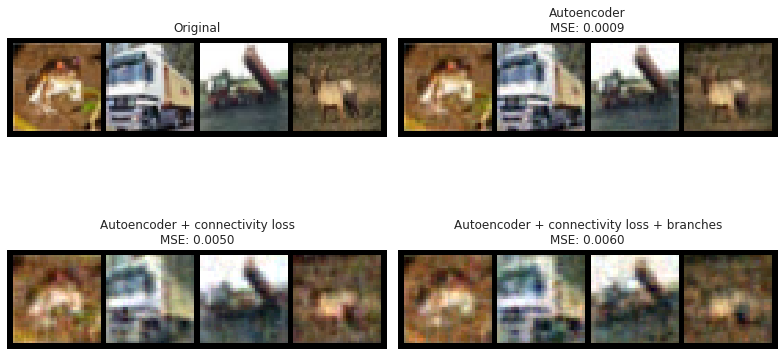

In [37]:
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

images = data[:4]
model = models[i]

ax = axes[0, 0]
imshow(torchvision.utils.make_grid(images), ax)
ax.set_title('Original')
ax.axis('off')

ax = axes[0, 1]
images_reconstructed = model_no_penalty.autoencoder(images.to(model.device))
err = F.mse_loss(images, images_reconstructed).item()
imshow(torchvision.utils.make_grid(images_reconstructed), ax)
ax.set_title('Autoencoder\nMSE: {:.4f}'.format(err))
ax.axis('off')

ax = axes[1, 0]
images_reconstructed = model_penalty.autoencoder(images.to(model.device))
err = F.mse_loss(images, images_reconstructed).item()
imshow(torchvision.utils.make_grid(images_reconstructed), ax)
ax.set_title('Autoencoder + connectivity loss\nMSE: {:.4f}'.format(err))
ax.axis('off')

ax = axes[1, 1]
images_reconstructed = model_penalty_branches.autoencoder(images.to(model.device))
err = F.mse_loss(images, images_reconstructed).item()
imshow(torchvision.utils.make_grid(images_reconstructed), ax)
ax.set_title('Autoencoder + connectivity loss + branches\nMSE: {:.4f}'.format(err))
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('reconstruction_training_images.eps')

### Reconstruction of unseen images

Generalization error is not worse, sometimes better for connectivity constrained models.

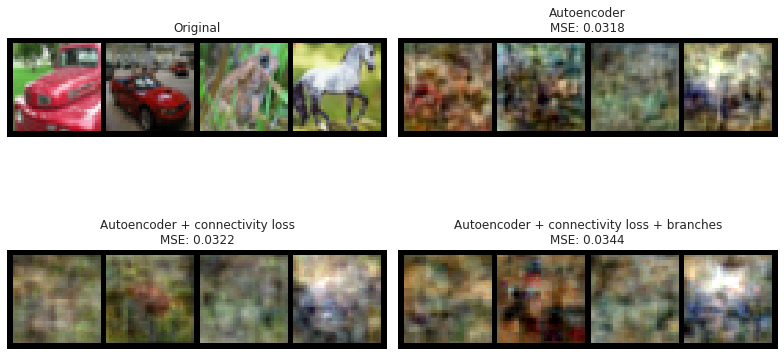

In [46]:
loader = torch.utils.data.DataLoader(cifar, batch_size=4, shuffle=True)
dataiter = iter(loader)
images, _ = dataiter.next()

fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

ax = axes[0, 0]
imshow(torchvision.utils.make_grid(images), ax)
ax.set_title('Original')
ax.axis('off')

ax = axes[0, 1]
images_reconstructed = model_no_penalty.autoencoder(images.to(model.device))
err = F.mse_loss(images, images_reconstructed).item()
imshow(torchvision.utils.make_grid(images_reconstructed), ax)
ax.set_title('Autoencoder\nMSE: {:.4f}'.format(err))
ax.axis('off')

ax = axes[1, 0]
images_reconstructed = model_penalty.autoencoder(images.to(model.device))
err = F.mse_loss(images, images_reconstructed).item()
imshow(torchvision.utils.make_grid(images_reconstructed), ax)
ax.set_title('Autoencoder + connectivity loss\nMSE: {:.4f}'.format(err))
ax.axis('off')

ax = axes[1, 1]
images_reconstructed = model_penalty_branches.autoencoder(images.to(model.device))
err = F.mse_loss(images, images_reconstructed).item()
imshow(torchvision.utils.make_grid(images_reconstructed), ax)
ax.set_title('Autoencoder + connectivity loss + branches\nMSE: {:.4f}'.format(err))
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('reconstruction_unseen_images.eps')